# Fit & Evaluate Model
A notebook to show how to fit a binary logistic regression model & assess its performance. For illustration purposes, a randomly selected subset of features is used as input variables for the base model. <br>
<font color=blue>Before you train your base model, what features will you select?</f>

In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn import metrics

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_pickle(r'/path/name.pkl')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12906 entries, 0 to 12905
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   patient_id                        12906 non-null  int64  
 1   DiagPeriodL90D                    12906 non-null  int64  
 2   patient_age                       12906 non-null  int64  
 3   education_bachelors               12906 non-null  float64
 4   income_individual_median          12906 non-null  float64
 5   home_value                        12906 non-null  float64
 6   commute_time                      12906 non-null  float64
 7   health_uninsured                  12906 non-null  float64
 8   widowed                           12906 non-null  float64
 9   education_less_highschool         12906 non-null  float64
 10  patient_race                      6521 non-null   object 
 11  patient_state                     12855 non-null  object 
 12  Regi

<b>Sampling</b>

In [5]:
# Specifying the target (y) and the input cols (X); input columns are not intentionally 
# selected for good model performance.

y = df['DiagPeriodL90D']
X = df[['patient_age','income_individual_median','home_value', 'patrace_White', 'education_bachelors', 
        'labor_force_participation', 'education_less_highschool', 'widowed', 'commute_time', 
        'limited_english', 'rent_median', 'self_employed' ]]
X,y


(       patient_age  income_individual_median    home_value  patrace_White  \
 0               84               24563.57143  2.646343e+05              0   
 1               62               41287.27273  6.776885e+05              1   
 2               43               40399.03333  2.377131e+05              1   
 3               45               55336.28571  1.012474e+06              1   
 4               55               29073.18367  2.498457e+05              0   
 5               66               35780.84375  1.504388e+05              1   
 6               51               36053.40000  8.737560e+05              0   
 7               60               32379.13333  9.701639e+04              1   
 8               82               30761.81034  3.061144e+05              1   
 9               64               38353.98077  1.476496e+05              0   
 10              67               31672.42308  1.519570e+05              0   
 11              66               36053.40000  8.737560e+05     

In [6]:
# Check how balance the target is to see if we need to maintain the same ratio in the train-test sets

df['DiagPeriodL90D'].value_counts(normalize=True) # normalize = True means to show percentages

1    0.624516
0    0.375484
Name: DiagPeriodL90D, dtype: float64

In this case, since the ratio is roughly 62%/38%, and we want to maintain the same ratio in the
training & test sets.  Therefore, we need to stratify our samples.

In [7]:
# Split the df into training set (.7) & test set (.3); if we don't need to create stratified samples,
# just omit 'stratify = y,'

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=12345)

# Check to see the ratio is maintained in both sets

y_train_ratio = y_train.value_counts(normalize=True)
y_test_ratio = y_test.value_counts(normalize=True)

print('Training Set Ratio')
print(round(y_train_ratio*100,3))
print('---------------------------------------')
print('Test Set Ratio')
print(round(y_test_ratio*100,3))



Training Set Ratio
1    62.453
0    37.547
Name: DiagPeriodL90D, dtype: float64
---------------------------------------
Test Set Ratio
1    62.448
0    37.552
Name: DiagPeriodL90D, dtype: float64


The ratio of 1's & 0's in both the training and test sets is very similar since we stratify the 2 sets by the target variable.

<b>Model Fitting</b>

In [8]:
# Instantiate a logistic regression model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Get predictions from the training set and test set
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)


<b> Model performance</b>
Now, we are comparing model performance between the training and test sets. What we hope to see is reasonably decent and stable results. In other words, we don't want to see big differences of each metric between the training and test sets. If we see the metrics drop substantially in the test set, it indicates the model is overfitting, which means the model learns the training data too well and fails to generalize to unseen data. 
On the contrary, if metrics from both training and testing sets are low, it indicates the model is underfitting, which means the model is not learning well from the training data and resulting in poor performance in the test set as well.
Defintion and calculations of these metrics are coming up.

In [9]:
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test= accuracy_score(y_test, y_test_pred)
print(f'Accuracy - Train: {accuracy_train}')
print(f'Accuracy - Test: {accuracy_test}')
print('------------------------------------------------')
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)
print(f'Precision - Train: {precision_train}')
print(f'Precision - Test: {precision_test}')
print('------------------------------------------------')
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)
print(f'Recall - Train: {recall_train}')
print(f'Recall - Test: {recall_test}')
print('------------------------------------------------')
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)
print(f'F1 - Train: {f1_train}')
print(f'F1 - Test: {f1_test}')
print('------------------------------------------------')
# Confusion matrix
print('Confusion Matrix - Train:')
print(metrics.confusion_matrix(y_train, y_train_pred))
print('Confusion Matrix - Test:')
print(metrics.confusion_matrix(y_test, y_test_pred))

Accuracy - Train: 0.6246402479521806
Accuracy - Test: 0.6244834710743802
------------------------------------------------
Precision - Train: 0.6245986936787336
Precision - Test: 0.624547803617571
------------------------------------------------
Recall - Train: 1.0
Recall - Test: 0.9995864350703061
------------------------------------------------
F1 - Train: 0.7689267461669506
F1 - Test: 0.768765903307888
------------------------------------------------
Confusion Matrix - Train:
[[   1 3391]
 [   0 5642]]
Confusion Matrix - Test:
[[   1 1453]
 [   1 2417]]


Here is a clearly labelled confusion matrix.

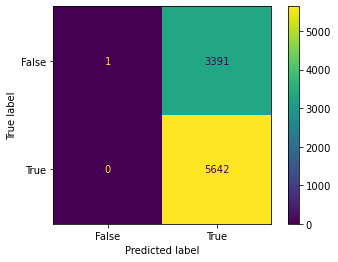

In [10]:

confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


Looking at the confusion matrix, there is much to improve. For instance, the model predicted 3391 true instances, which are actually false.

In [11]:
TN = 1
FN = 0
FP = 3391
TP = 5642


<b>Running the metrics manually</b>

 <b>Accuracy</b>: Correctly classified labels divided by all labels 

In [12]:
Accuracy = (TP + TN) / (TP + TN + FP + FN)
print(Accuracy)


0.6246402479521806


<b>Precision</b>: True positive predictions divded by all positive predictions

In [13]:
Precision = TP / (TP + FP)
print(Precision)

0.6245986936787336


<b>Recall</b>: AKA sensitivity; the proportion of correctly predicted positive out of all actual positives.<br> 
It answers the qn, "Out of all actual positives, how many did the model predict correctly?"

In [14]:
# TP / (TP + FN)

Recall = TP / (TP + FN)
print(Recall)

1.0


<b>F1</b>: Harmonic mean of precision and recall; perfect balance is 1 while poorest balance is 0

In [15]:
# F1 = 2 * ((Precision * Recall)/(Precision + Recall))

F1 = 2*((Precision * Recall)/(Precision + Recall))
print(F1)

0.7689267461669506


<b>AUC Curve</b>
<br>The AUC curve is another model performance metric for binary classification.  AUC can range between 0 and 1 with a higher value indicating a better performance. A value of 0.5 means the model works pretty much the same as a random guess. So this model has much to improve.

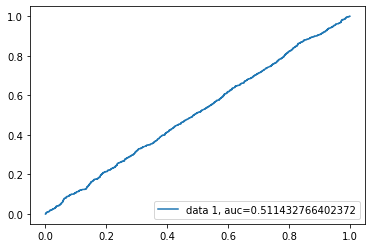

In [16]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

<font color=blue><br>
- How good do you think this model is? What would you do next?<br>
  Ans. This is an average model at best. The next step should be to try different features and fit the model again to see if we can get a better model.

</font>